# Bike Rental Prediction

In this project, we'll try to predict the total number of bikes people rent in a given hour. 

We'll predict the cnt column using all of the other columns, except for casual and registered. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv("bike_rental_hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# removing the first column which was unnecessary
df = df[df.columns[1:]]
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [7]:
## percent of duplicate rows
np.sum(df.duplicated())/df.shape[0]

0.0

In [8]:
np.sum(df.T.duplicated())

0

In [9]:
df.describe(include= "all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [10]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


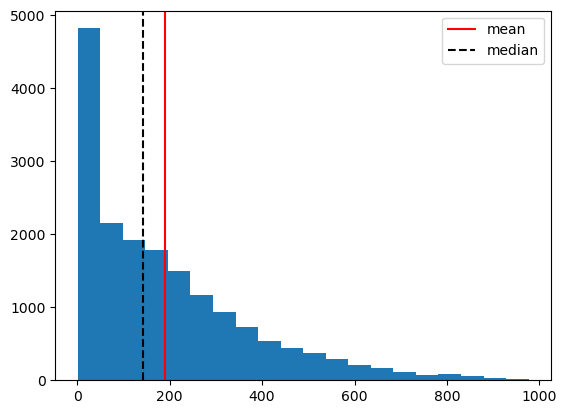

In [12]:
plt.hist(df.cnt, bins = 20)
plt.axvline(df.cnt.mean(), c="red", label="mean")
plt.axvline(df.cnt.median(), c="black", linestyle="--", label="median")
plt.legend()
plt.show()

In [13]:
copy_df = df.loc[:, df.columns != "dteday"]
copy_df.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
copy_df.corr()['cnt']

season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [15]:
def assign_label(x):
    if x >=0 and x<6:
        return 4
    elif x>=6 and x<12:
        return 0
    elif x>=12 and x<18:
        return 1
    elif x>=18 and x<24:
        return 2

df["assign_label"] = df["hr"].apply(assign_label)

In [16]:
def assign_label(x):
    if x >=0 and x<6:
        return 4
    elif x>=6 and x<12:
        return 0
    elif x>=12 and x<18:
        return 1
    elif x>=18 and x<24:
        return 2

copy_df["assign_label"] = copy_df["hr"].apply(assign_label)

C:\Users\kalra\AppData\Local\Temp\ipykernel_12824\2056945979.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df["assign_label"] = copy_df["hr"].apply(assign_label)


In [17]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,assign_label
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [18]:
copy_df.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,assign_label
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [19]:
copy_df.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,assign_label
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056,0.007584
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495,0.005321
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638,0.006713
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,-0.360800
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927,-0.000770
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900,0.002759
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284,-0.001292
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426,-0.030170
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,-0.084789
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929,-0.080219


In [20]:
columns = df.columns.drop(['cnt', 'casual', 'dteday', 'registered'])
columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'assign_label'],
      dtype='object')

#### Mean Squared Error

The Mean Square Error (MSE) is a crucial metric for evaluating the performance of predictive models. It measures the average squared difference between the predicted and the actual target values within a dataset. The primary objective of the MSE is to assess the quality of a model's predictions by measuring how closely they align with the ground truth.

In [22]:
copy_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,assign_label
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


Splitting the data into train - 80% and test - 20%. Then checking the shape to confirm if they were correctly moved.

In [31]:
train = copy_df.sample(frac=0.8)

In [32]:
test = copy_df.drop(train.index)

In [33]:
train.shape[0] + test.shape[0] == copy_df.shape[0]

True

#### Linear regression on the split data

In [34]:
# Instantiate the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(train[columns], train["cnt"])


LinearRegression()

In [35]:
# Predict the model
prediction_lin_reg = lin_reg.predict(test[columns])

prediction_lin_reg

array([131.83949111, 133.80035447,  73.12645242, ..., -13.14122426,
       185.86409026, 174.18694699])

In [37]:
# check the MSE test
mse_test = mean_squared_error(test["cnt"], prediction_lin_reg)

mse_test

17637.97001891133

In [38]:
# check the MSE train
prediction_lin_reg_train = lin_reg.predict(train[columns])
mse_train = mean_squared_error(train["cnt"], prediction_lin_reg_train)

mse_train

17292.29804189466

In [47]:
print(f"Linear Regression R^2 score on training set: {lin_reg.score(train[columns], train["cnt"]):0.3f}")
print(f"Linear Regression R^2 score on test set: {lin_reg.score(test[columns], test["cnt"]):0.3f}")

Linear Regression R^2 score on training set: 0.474
Linear Regression R^2 score on test set: 0.467


The error is very high. Larger errors are penalized more with MSE, which leads to a higher total error. Linear regression is not the best fit. We can use the decision tree to see if we can improve our predictions. The linear regression method is great for datasets with lots of continuous data, but a lot of the columns in this dataset is not continuous, but rather categorical.

#### Decision Tree Model

In [42]:
# Instantiate the DT model
dt_model = DecisionTreeRegressor(min_samples_leaf=5)

# Fit the model
dt_model.fit(train[columns], train["cnt"])

DecisionTreeRegressor(min_samples_leaf=5)

In [43]:
# Predict the DT model for test
pred_dt_model = dt_model.predict(test[columns])
pred_dt_model

array([ 97.28571429, 220.2       , 119.125     , ...,   2.6       ,
       124.77777778, 207.5       ])

In [44]:
# check the MSE test
mse_test = mean_squared_error(test["cnt"], pred_dt_model)
mse_test

2943.8040556422457

Note: We can do the previous mse manually also,

``` python
numpy.mean((pred_dt_model - test["cnt"]) ** 2)

```

In [46]:
print(f"DT R^2 score on training set: {dt_model.score(train[columns], train["cnt"]):0.3f}")
print(f"DT R^2 score on test set: {dt_model.score(test[columns], test["cnt"]):0.3f}")

DT R^2 score on training set: 0.964
DT R^2 score on test set: 0.911


#### Random Forest Regressor

In [48]:
# Instantiate the RF model
forest = RandomForestRegressor(min_samples_leaf=5)

# Fit the model
forest.fit(train[columns], train["cnt"])

RandomForestRegressor(min_samples_leaf=5)

In [49]:
# Predict the RF model
pred_forest = forest.predict(test[columns])
pred_forest

array([120.94324232, 156.37306238,  99.04726403, ...,   3.02938641,
       123.30699703, 241.6823923 ])

In [50]:
# check the MSE test
mse_test_forest = mean_squared_error(test["cnt"], pred_forest)
mse_test_forest

2089.180807623409

In [51]:
print(f"Random Forest R^2 score on training set: {forest.score(train[columns], train["cnt"]):0.3f}")
print(f"Random Forest R^2 score on test set: {forest.score(test[columns], test["cnt"]):0.3f}")

Random Forest R^2 score on training set: 0.966
Random Forest R^2 score on test set: 0.937


The Prediction score is much better in Random Forest Regressor.